<h1>Matplotlib - osa 7</h1>
<h2>Usean kaavion kuviot</h2>

Tämä on jatkoa sarjan edellisille osille

https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib1.ipynb

https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib2.ipynb

https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib3.ipynb

https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib4.ipynb

https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib5.ipynb

https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib6.ipynb

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Avaan datan
df = pd.read_excel('http://taanila.fi/data1.xlsx')

Kaavio on <b>Axes</b>-luokan olio. Kaavio sijaitsee kuvion (<b>Figure</b>) sisällä. Saman kuvion sisälle voi sijoittaa useita kaavioita. Voit ajatella, että <b>Figure</b> on kehys, jonka sisällä on yksi tai useampia kaavioita.

Seuraavassa luon <b>subplots()</b>-toiminnolla kuvion, jonka sisällä on neljä (2 x 2) kaaviota (ilman esitettävää sisältöä). <b>subplots()</b> palauttaa kuvion (annan tässä sille nimeksi <b>fig</b>) ja kokoelman kaavioita (annan kokoelmalla nimeksi <b>ax</b>). 

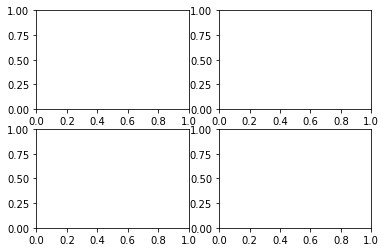

In [2]:
fig, ax = plt.subplots(nrows = 2, ncols = 2)

Seuraavassa lisään kuvion sisään neljä kaavioita kuten edellä ja määritän kuvion (<b>figure</b>) kooksi 10 x 6.

<b>wspace</b> ja <b>hspace</b> määrittävät kaavioiden välisen tyhjän tilan (w = weigth eli leveys, h = heigth eli korkeus).

Lisään kuhunkin kaavioon sisältöä yksi kerrallaan. <b>ax[0, 0]</b> viittaa ensimmäisen rivin ensimmäiseen kaavioon, <b>ax[0, 1]</b> viittaa ensimmäisen rivin toiseen kaavioon jne.

Text(0, 0.5, 'Lukumäärä')

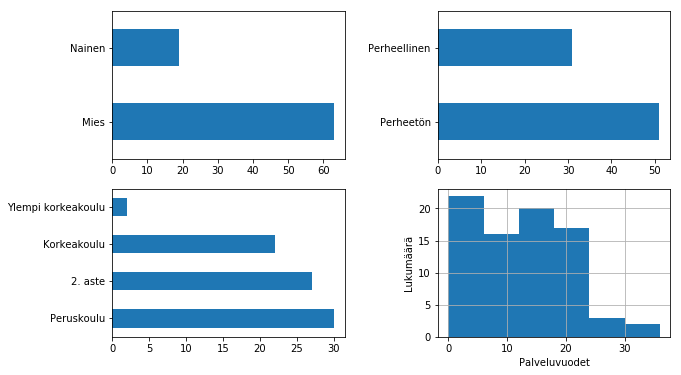

In [3]:
fig, ax1 = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 6))

fig.subplots_adjust(wspace=0.4, hspace=0.2)

df['sukup'].value_counts().plot.barh(ax = ax1[0, 0])
ax1[0, 0].set_yticklabels(['Mies', 'Nainen'])

df['perhe'].value_counts().plot.barh(ax = ax1[0, 1])
ax1[0, 1].set_yticklabels(['Perheetön', 'Perheellinen'])

df['koulutus'].value_counts().plot.barh(ax = ax1[1, 0])
ax1[1, 0].set_yticklabels( ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu'])

df['palveluv'].hist(bins = 6, ax = ax1[1, 1])
ax1[1, 1].set_xlabel('Palveluvuodet')
ax1[1, 1].set_ylabel('Lukumäärä')

Jos teen kaavion suoraan dataframesta, niin <b>subplots</b>-lisäparametrilla kustakin dataframen sarakkeesta tehdään oma kaavio.

<b>sharex</b> ja <b>sharey</b> -lisäparametreilla voin pakottaa kaavioille yhteisen x-akselin ja y-akselin.

In [4]:
# Dataframen laskeminen
df1 = df['johto'].value_counts(sort = False, normalize = True).to_frame()
df1['työtov'] = df['työtov'].value_counts(sort = False, normalize = True)
df1['työymp'] = df['työymp'].value_counts(sort = False, normalize = True)
df1['palkkat'] = df['palkkat'].value_counts(sort = False, normalize = True)
df1['työteht'] = df['työteht'].value_counts(sort = False, normalize = True)

df1.index = ['Erittäin tyytymätön', 'Jokseenkin tyytymätön', 'Ei tyytymätön eikä tyytyväinen', 
                'Jokseenkin tyytyväinen', 'Erittäin tyytyväinen']
df1 = df1 * 100
df1

,johto,työtov,työymp,palkkat,työteht
Erittäin tyytymätön,8.536585,NaN,10.975610,40.243902,6.097561
Jokseenkin tyytymätön,19.512195,3.703704,10.975610,23.170732,18.292683
Ei tyytymätön eikä tyytyväinen,36.585366,19.753086,36.585366,23.170732,35.365854
Jokseenkin tyytyväinen,28.048780,43.209877,28.048780,12.195122,30.487805
Erittäin tyytyväinen,7.317073,33.333333,13.414634,1.219512,9.756098


Text(0.5, 0, '%')

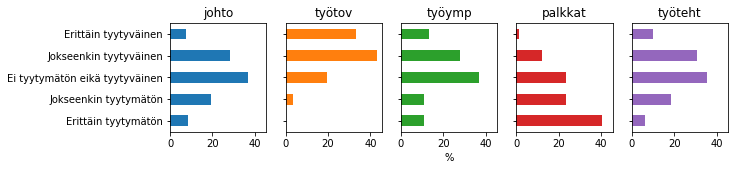

In [5]:
ax2 = df1.plot.barh(figsize = (10, 2), legend = False, subplots = True, layout = (1, 5), 
                           sharex = True, sharey = True)
ax2[0, 2].set_xlabel('%')

<h2>Lisätietoa</h2>

Tämä oli seitsemäs ja viimeinen osa matplotlib-perusteita käsittelevästä sarjasta. Tämän jälkeen on hyvä laajentaa osaamista <b>seaborn</b>-kirjastoon. Seaborn on matplotlibin pohjalta rakennettu kirjasto, joka helpottaa monin tavoin kaavioiden laatimista. Seabornilla laadittuja kaavioita voi muotoilla normaaliin tapaan matplotlibin toiminnoilla. Lue lisää 

https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/seaborn1.ipynb

https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/seaborn2.ipynb

Jos olet kiinnostunut viivakaavioiden käytöstä aikasarjojen yhteydessä, niin katso https://nbviewer.jupyter.org/github/taanila/tilastoapu/blob/master/aikasarjat.ipynb